#### Features/Column Description :-

1) X1 - Relative Compactness<br>
2) X2 - Surface Area<br>
3) X3 - Wall Area<br>
4) X4 - Roof Area<br>
5) X5 - Overall Height<br>
6) X6 - Orientation<br>
7) X7 - Glazing Area<br>
8) X8 - Glazing Area Distrbution<br>
9) Y1 - Heating Load<br>
10) Y2 - Cooling Load


<b>Regression Task</b><br>
Use the given dataset and perform the following:-
<ol>
<li> Read the 'heat_load.xlsx' dataset.</li>
<li> Rename the columns as per the given features</li> 
<li> Remove/handle null values if any</li>    
<li> Considering all the features as independent features (except heating and cooling load) Split the dataset into training and test dataset with test_size = 25%</li>
<li> Predict the Heating load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding to
each of these features. Generate equation of Linear regression</li>
<li>Predict the Cooling load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding 
to each of these features. Generate equation of Linear regression</li>
<li> Compute MSE, MAE, RMSE for two scenarios(5 and 6)</li> 
<li>Select appropriate independent features based on Correlation matrix</li>
<li>Repeat Q5 and Q7 for heating load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>
<li>Repeat Q6 and Q7 for cooling load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>   
</ol>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1. Read the 'heat_load.xlsx' dataset.
df = pd.read_excel("heat_load.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [4]:
# 2. Rename the columns as per the given features
df.rename(columns={"X1" :"Relative Compactness",
                   "X2" :"Surface Area",
                   "X3" :"Wall Area",
                   "X4" :"Roof Area",
                   "X5" :"Overall Height",
                   "X6" :"Orientation",
                   "X7" :"Glazing Area",
                   "X8" :"Glazing Area Distribution",
                   "Y1" :"Heating Load",
                   "Y2" :"Cooling Load"},inplace=True)

In [5]:
# 3. Remove/handle null values if any
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
# 4. Considering all the features as independent features (except heating and cooling load) Split the dataset into training
# and test dataset with test_size = 25%
from sklearn.model_selection import train_test_split
X = df.drop(['Heating Load','Cooling Load'],axis=1)
y1 = df['Heating Load']
y2 = df['Cooling Load']
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.25)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.25)

In [7]:
# 5. Predict the Heating load based on features from X1 to X8 and also calculate the model score. Also find the intercept 
# and the coefficients corresponding to each of these features. Generate equation of Linear regression
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y1_train)
model_1.score(X_test,y1_test)

-0.05268783527351162

In [8]:
c = model_1.coef_
i = model_1.intercept_
c,i

(array([ 6.18257526e+01,  8.20983815e-02, -9.25794539e-03,  4.56781635e-02,
         2.06309436e+00,  5.39238160e-01,  3.48488649e+00, -2.05028307e-01]),
 -98.36964542619111)

In [9]:
pred = model_1.predict(X_test)
pred[:10]

array([24.34851591, 23.16118246, 19.5351052 , 23.78190567, 23.12657925,
       21.39501951, 21.76715181, 20.72860265, 23.0360738 , 20.6729231 ])

In [10]:
data_1 = X_test.copy()
data_1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
59,0.86,588.0,294.0,147.0,7.0,5,0.10,1
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4
276,0.66,759.5,318.5,220.5,3.5,2,0.10,5
343,0.90,563.5,318.5,122.5,7.0,5,0.25,2
9,0.86,588.0,294.0,147.0,7.0,3,0.00,0


In [11]:
data_1["Heat Load Predicted"] = pred
data_1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heat Load Predicted
59,0.86,588.0,294.0,147.0,7.0,5,0.10,1,24.348516
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4,23.161182
276,0.66,759.5,318.5,220.5,3.5,2,0.10,5,19.535105
343,0.90,563.5,318.5,122.5,7.0,5,0.25,2,23.781906
9,0.86,588.0,294.0,147.0,7.0,3,0.00,0,23.126579


In [12]:
# y = m1x1+m2x2+...+mnxn+ c
data_1['Heat Load Equation'] = data_1['Relative Compactness']*c[0]+\
                               data_1['Surface Area']*c[1]+\
                               data_1['Wall Area']*c[2]+\
                               data_1['Roof Area']*c[3]+\
                               data_1['Overall Height']*c[4]+\
                               data_1['Orientation']*c[5]+\
                               data_1['Glazing Area']*c[6]+\
                               data_1['Glazing Area Distribution']*c[7]+i
data_1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heat Load Predicted,Heat Load Equation
59,0.86,588.0,294.0,147.0,7.0,5,0.10,1,24.348516,24.348516
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4,23.161182,23.161182
276,0.66,759.5,318.5,220.5,3.5,2,0.10,5,19.535105,19.535105
343,0.90,563.5,318.5,122.5,7.0,5,0.25,2,23.781906,23.781906
9,0.86,588.0,294.0,147.0,7.0,3,0.00,0,23.126579,23.126579


In [13]:
# 6. Predict the Cooling load based on features from X1 to X8 and also calculate the model score. Also find the intercept 
# and the coefficients corresponding to each of these features. Generate equation of Linear regression
model_2 = LinearRegression()
model_2.fit(X_train, y2_train)
model_2.score(X_test,y2_test)

0.8996473157634671

In [14]:
c_ = model_2.coef_
i_ = model_2.intercept_
c_,i_

(array([-7.72476413e+01, -7.42875269e-02,  2.34388060e-02, -4.88631664e-02,
         4.14934401e+00,  7.66772432e-02,  1.42335509e+01,  1.76909269e-02]),
 109.14997214549575)

In [15]:
pred_ = model_2.predict(X_test)
pred_[:10]

array([29.61389856, 33.70700489, 14.62395193, 32.26815921, 28.01949806,
       17.88136795, 32.31730533, 14.46990874, 19.49824907, 16.70591179])

In [16]:
data_1["Cooling Load Predicted"] = pred_
data_1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heat Load Predicted,Heat Load Equation,Cooling Load Predicted
59,0.86,588.0,294.0,147.0,7.0,5,0.10,1,24.348516,24.348516,29.613899
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4,23.161182,23.161182,33.707005
276,0.66,759.5,318.5,220.5,3.5,2,0.10,5,19.535105,19.535105,14.623952
343,0.90,563.5,318.5,122.5,7.0,5,0.25,2,23.781906,23.781906,32.268159
9,0.86,588.0,294.0,147.0,7.0,3,0.00,0,23.126579,23.126579,28.019498


In [17]:
# y = m1x1+m2x2+...+mnxn+ c
data_1['Cooling Load Equation'] = data_1['Relative Compactness']*c_[0]+\
                                  data_1['Surface Area']*c_[1]+\
                                  data_1['Wall Area']*c_[2]+\
                                  data_1['Roof Area']*c_[3]+\
                                  data_1['Overall Height']*c_[4]+\
                                  data_1['Orientation']*c_[5]+\
                                  data_1['Glazing Area']*c_[6]+\
                                  data_1['Glazing Area Distribution']*c_[7]+i_
data_1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heat Load Predicted,Heat Load Equation,Cooling Load Predicted,Cooling Load Equation
59,0.86,588.0,294.0,147.0,7.0,5,0.10,1,24.348516,24.348516,29.613899,29.613899
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4,23.161182,23.161182,33.707005,33.707005
276,0.66,759.5,318.5,220.5,3.5,2,0.10,5,19.535105,19.535105,14.623952,14.623952
343,0.90,563.5,318.5,122.5,7.0,5,0.25,2,23.781906,23.781906,32.268159,32.268159
9,0.86,588.0,294.0,147.0,7.0,3,0.00,0,23.126579,23.126579,28.019498,28.019498


In [18]:
# 7. Compute MSE, MAE, RMSE for two scenarios(5 and 6)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f"Accuracy obtained for model_1: {r2_score(y1_test,pred):.2f}")
print(f"Mean Absolute Error obtained for model_1: {mean_absolute_error(y1_test,pred):.2f}")
print(f"Mean Squared Error for model_1: {mean_squared_error(y1_test,pred):.2f}")
print(f"Root Mean Squared Error obtained for model_1: {mean_squared_error(y1_test,pred)**0.5:.2f}")
print()
print(f"Accuracy obtained for model_2: {r2_score(y2_test,pred_):.2f}")
print(f"Mean Absolute Error obtained for model_2: {mean_absolute_error(y2_test,pred_):.2f}")
print(f"Mean Squared Error for model_2: {mean_squared_error(y2_test,pred_):.2f}")
print(f"Root Mean Squared Error obtained for model_2: {mean_squared_error(y2_test,pred_)**0.5:.2f}")

Accuracy obtained for model_1: -0.05
Mean Absolute Error obtained for model_1: 9.12
Mean Squared Error for model_1: 103.58
Root Mean Squared Error obtained for model_1: 10.18

Accuracy obtained for model_2: 0.90
Mean Absolute Error obtained for model_2: 2.18
Mean Squared Error for model_2: 9.23
Root Mean Squared Error obtained for model_2: 3.04


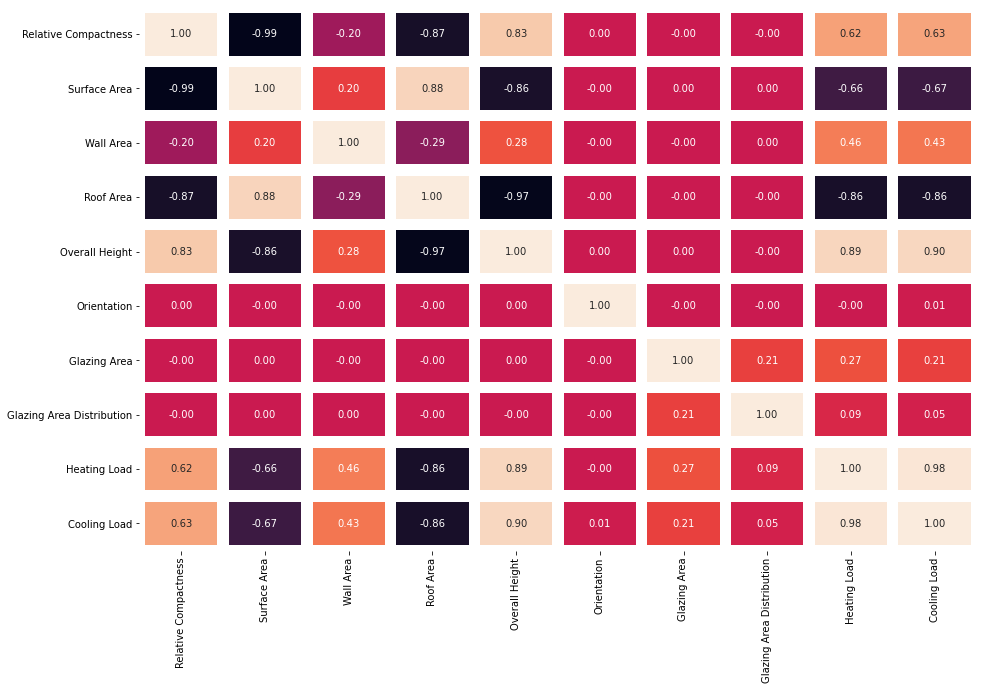

In [19]:
# 8. Select appropriate independent features based on Correlation matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=10.5,
                 fmt=".2f",
                 cbar=False,
                 color=["Yellow","Green","Blue"]);

**Assuming the threshold value of 0.5 for selecting the feature that highly corresponds to the target variables**
Variables selected for model1:
* Relative Compactness (0.62)
* Overall Height (0.89)
* Wall Area (0.46)

**For Heating Load**

In [20]:
# 9. Repeat Q5 and Q7 for heating load after the original dataset has been split into training and testing dataset with 
# test_size=25% with appropriate independent features selected from correlation matrix
sel_features = df[['Relative Compactness','Overall Height','Wall Area','Roof Area','Heating Load']]
sel_features

,Relative Compactness,Overall Height,Wall Area,Roof Area,Heating Load
0,0.98,7.0,294.0,110.25,15.55
1,0.98,7.0,294.0,110.25,15.55
2,0.98,7.0,294.0,110.25,15.55
3,0.98,7.0,294.0,110.25,15.55
4,0.90,7.0,318.5,122.50,20.84
...,...,...,...,...,...
763,0.64,3.5,343.0,220.50,17.88
764,0.62,3.5,367.5,220.50,16.54
765,0.62,3.5,367.5,220.50,16.44
766,0.62,3.5,367.5,220.50,16.48


In [21]:
X_ = sel_features.drop(['Heating Load'],axis=1)
y1_ = sel_features['Heating Load']

In [22]:
X_train_, X_test_,y1_train_,y1_test_ = train_test_split(X_,y1_,test_size=0.25)
model_3 = LinearRegression()
model_3.fit(X_train_,y1_train_)
model_3.score(X_test_, y1_test_)

0.8531338647583482

In [23]:
pred_1 = model_3.predict(X_test_)
pred_1[:10]

array([15.37138127, 10.83720023, 28.74100158, 37.23014635, 12.79532729,
       10.83720023, 30.42479936, 28.17298821, 14.75345435, 37.23014635])

In [24]:
print(f"Accuracy obtained for model_3: {r2_score(y1_test_,pred_1):.2f}")
print(f"Mean Absolute Error obtained for model_3: {mean_absolute_error(y1_test_,pred_1):.2f}")
print(f"Mean Squared Error for model_3: {mean_squared_error(y1_test_,pred_1):.2f}")
print(f"Root Mean Squared Error obtained for model_3: {mean_squared_error(y1_test_,pred_1)**0.5:.2f}")

Accuracy obtained for model_3: 0.85
Mean Absolute Error obtained for model_3: 3.01
Mean Squared Error for model_3: 16.24
Root Mean Squared Error obtained for model_3: 4.03


**For Cooling Load**

In [25]:
# 10. Repeat Q6 and Q7 for cooling load after the original dataset has been split into training and testing dataset with 
# test_size=25% with appropriate independent features selected from correlation matrix
sel_features_ = df[['Relative Compactness','Wall Area','Overall Height','Cooling Load']]
sel_features_.head()

,Relative Compactness,Wall Area,Overall Height,Cooling Load
0,0.98,294.0,7.0,21.33
1,0.98,294.0,7.0,21.33
2,0.98,294.0,7.0,21.33
3,0.98,294.0,7.0,21.33
4,0.90,318.5,7.0,28.28


In [26]:
X_ = sel_features_.drop('Cooling Load', axis=1)
y2_ = sel_features_['Cooling Load']

In [27]:
X_train_, X_test_,y2_train_,y2_test_ = train_test_split(X_,y2_,test_size=0.25)
model_4 = LinearRegression()
model_4.fit(X_train_,y2_train_)
model_4.score(X_test_, y2_test_)

0.8470679021770635

In [28]:
pred_2 = model_4.predict(X_test_)
pred_2[:10]

array([17.65996281, 15.63938291, 15.63938291, 18.59398247, 17.65996281,
       18.59398247, 30.17471584, 13.61880301, 34.33086398, 36.67530118])

In [29]:
print(f"Accuracy obtained for model_4: {r2_score(y2_test_,pred_2):.2f}")
print(f"Mean Absolute Error obtained for model_4: {mean_absolute_error(y2_test_,pred_2):.2f}")
print(f"Mean Squared Error for model_4: {mean_squared_error(y2_test_,pred_2):.2f}")
print(f"Root Mean Squared Error obtained for model_4: {mean_squared_error(y2_test_,pred_2)**0.5:.2f}")

Accuracy obtained for model_4: 0.85
Mean Absolute Error obtained for model_4: 2.83
Mean Squared Error for model_4: 13.82
Root Mean Squared Error obtained for model_4: 3.72
